In [23]:
import pandas as pd
from pybaseball import pitching_stats
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
stat23 = pitching_stats(2023)

stat23 = stat23[['Name','FIP']]

In [15]:
def reformat_name(name):
    parts = name.split()
    first, last = parts
    return f"{last}, {first}"

stat23['Name'] = stat23['Name'].apply(reformat_name)

stat23 = stat23.rename(columns={
    'Name': 'player_name'
})

In [17]:
scores = pd.read_csv("pitch_scores.csv")

In [20]:
joined_data = stat23.merge(scores,how='left',on='player_name')
joined_data.dropna()

,player_name,FIP,overall,fastball,sinker,cutter,slider,sweeper,curveball,changeup,splitter
0,"Wheeler, Zack",3.15,101.22,99.86,101.36,101.15,106.17,105.86,100.94,102.38,0.00
1,"Strider, Spencer",2.85,106.24,110.08,0.00,0.00,100.69,0.00,104.72,100.71,0.00
2,"Gausman, Kevin",2.97,101.77,105.42,0.00,0.00,94.94,91.70,0.00,0.00,98.91
3,"Gray, Sonny",2.83,98.90,94.50,100.25,101.91,0.00,97.48,103.47,101.73,0.00
4,"Gallen, Zac",3.26,100.58,105.97,101.58,93.04,93.58,0.00,95.25,98.09,0.00
5,"Cole, Gerrit",3.16,105.19,106.71,0.00,101.75,103.41,0.00,106.59,100.04,0.00
6,"Steele, Justin",3.02,96.17,94.26,98.48,0.00,99.33,0.00,103.31,98.09,0.00
7,"Webb, Logan",3.16,104.07,91.69,100.12,0.00,0.00,102.72,0.00,109.00,0.00
8,"Eflin, Zach",3.01,101.50,96.86,102.56,103.67,100.59,103.83,99.58,96.95,0.00
10,"Kirby, George",3.34,100.80,98.64,102.90,0.00,103.84,0.00,100.61,101.89,97.33


In [22]:
correlation = joined_data['FIP'].corr(joined_data['overall'])
correlation

-0.4974395550269982

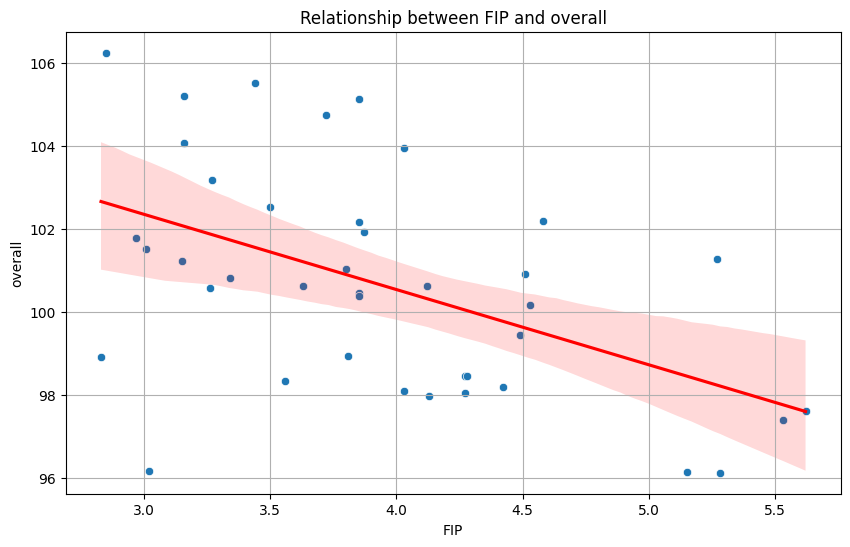

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FIP', y='overall', data=joined_data)
sns.regplot(x='FIP', y='overall', data=joined_data, scatter=False, color='red')
plt.title(f'Relationship between FIP and overall')
plt.xlabel('FIP')
plt.ylabel('overall')
plt.grid(True)
plt.show()